In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

ges = pd.read_csv("ges.csv")
ges.head()

,Unnamed: 0,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,0,1AS001,1,Allied Signal,TFE731-2-2B,NaN,TF,2.64,13.90,15.60,...,1976-04-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1AS002,1,Allied Signal,TFE731-3,NaN,TF,2.64,14.30,16.50,...,1976-08-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4AL003,4,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.23,18.08,33.73,...,1995-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6AL004,6,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.10,16.60,31.50,...,1995-04-19,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6AL005,6,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.77,17.97,34.91,...,1995-04-19,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [44]:
# drop extra columns
ges = ges.drop(['Unnamed: 0','GSDB No','Combustor Description', 'Pressure Ratio','Rated Thrust (kN)',	'Data Status','Data Superseded','Superseded by UID No', 'Test Engine Status', 'Data corr as Annex 16', 'Current Engine Status',	
              'Current Engine Status Date', 'HC Dp/Foo Sigma (g/kN)', 'HC Dp/Foo Min (g/kN)', 'HC Dp/Foo Max (g/kN)', 'HC Dp/Foo Characteristic (g/kN)', 'HC Dp/Foo Characteristic (% of Reg limit) ', 'CO Dp/Foo Sigma (g/kN)',	
              'CO Dp/Foo Min (g/kN)',	'CO Dp/Foo Max (g/KN)',	'CO Dp/Foo Characteristic (g/kN)', 'CO Dp/Foo Characteristic (% of Reg limit) ', 'NOx Dp/Foo Sigma (g/kN)',	'NOx Dp/Foo Min (g/kN)', 'NOx Dp/Foo Max (g/kN)', 
              'NOx Dp/Foo Characteristic (g/kN)', 'NOx Dp/Foo Characteristic (% of CAEP/2 standard)',	'NOx Dp/Foo Characteristic (% of CAEP/4 standard)',	'NOx Dp/Foo Characteristic (% of CAEP/6 standard)', 
              'NOx Dp/Foo Characteristic (% of CAEP/8 standard)', 'NOx Compliance Demonstration §', 'SN T/O','SN C/O','SN App', 'SN Idle', 'SN Number Test', 'SN Number Eng', 'SN Max', 'NOx Dp/Foo Characteristic (% of original standard) ',
              'SN Sigma', 'SN Range Min', 'SN Range Max', 'SN Characteristic', 'SN Characteristic (% of Reg limit)', 'Fuel H/C Ratio Min','Fuel H/C Ratio Max',	'Fuel Arom Min (%)', 'Fuel Arom Max (%)', 'Loads Power Extraction (kW)', 
              'Loads Power Extraction @Power', 'Loads Stage Bleed CF (%)', 'Loads Stage Bleed @Power', 'Ambient Baro Min (kPa)', 'Ambient Baro Max (kPa)', 'Ambient Temp Min (K)', 'Ambient Temp Max (K)', 'Humidity Min (kg/kg)', 
              'Humidity Max (kg/kg)', 'Test Organisation', 'Test Location', 'Initial Test Date', 'Final Test Date', 'Compliance with fuel venting requirements', 'Remark 1', 'Remark 2', 'Remark 3', 'Remark 4', 'Remark 5', 'Remark 6', 
              'Remark 7', 'Remark 8'], axis=1)

In [45]:
ges.columns

Index(['UID No', 'Manufacturer', 'Engine Identification', 'Eng Type',
       'B/P Ratio', 'HC EI T/O (g/kg)', 'HC EI C/O (g/kg)', 'HC EI App (g/kg)',
       'HC EI Idle (g/kg)', 'HC Number Test', 'HC Number Eng',
       'HC Dp/Foo Avg (g/kN)', 'HC LTO Total mass (g)', 'CO EI T/O (g/kg)',
       'CO EI C/O (g/kg)', 'CO EI App (g/kg)', 'CO EI Idle (g/kg)',
       'CO Number Test', 'CO Number Eng', 'CO Dp/Foo Avg (g/kN)',
       'CO LTO Total Mass (g)', 'NOx EI T/O (g/kg)', 'NOx EI C/O (g/kg)',
       'NOx EI App (g/kg)', 'NOx EI Idle (g/kg)', 'NOx Number Test',
       'NOx Number Eng', 'NOx Dp/Foo Avg (g/kN)', 'NOx LTO Total mass (g)',
       'Fuel Spec', 'Fuel Flow T/O (kg/sec)', 'Fuel Flow C/O (kg/sec)',
       'Fuel Flow App (kg/sec)', 'Fuel Flow Idle (kg/sec)',
       'Fuel LTO Cycle (kg)  '],
      dtype='object')

In [46]:
ges.tail()

,UID No,Manufacturer,Engine Identification,Eng Type,B/P Ratio,HC EI T/O (g/kg),HC EI C/O (g/kg),HC EI App (g/kg),HC EI Idle (g/kg),HC Number Test,...,NOx Number Test,NOx Number Eng,NOx Dp/Foo Avg (g/kN),NOx LTO Total mass (g),Fuel Spec,Fuel Flow T/O (kg/sec),Fuel Flow C/O (kg/sec),Fuel Flow App (kg/sec),Fuel Flow Idle (kg/sec),Fuel LTO Cycle (kg)
810,1TL004,Textron Lycoming,"LF507-1F, -1H",TF,5.1,0.01,0.01,0.12,4.72,3.0,...,3.0,1.0,34.90,1086.0,0.81,0.3578,0.2961,0.1083,0.0453,151.0
811,1ZM001,IVCHENKO PROGRESS ZMBK,D-36,TF,5.0,0.00,0.00,0.00,5.40,7.0,...,7.0,3.0,56.30,NaN,RT,0.6340,0.5330,0.2110,NaN,NaN
812,13ZM002,IVCHENKO PROGRESS ZMBK,D-36 ser. 4A,TF,5.0,0.00,0.00,0.00,5.40,7.0,...,7.0,3.0,56.30,NaN,RT,0.6340,0.5330,0.2110,0.0920,265.0
813,13ZM003,IVCHENKO PROGRESS ZMBK,D-436-148 F1,TF,4.9,0.10,0.04,0.07,2.26,8.0,...,8.0,8.0,36.18,NaN,RT,0.5480,0.4680,0.2180,0.0930,260.0
814,13ZM004,IVCHENKO PROGRESS ZMBK,D-436-148 F2,TF,4.9,0.09,0.05,0.08,1.39,8.0,...,8.0,8.0,37.96,NaN,RT,0.5810,0.4930,0.2250,0.0990,274.0


In [47]:
ges.shape

(815, 35)

In [48]:
#independent and dependent variables
ges2 = ges[['Eng Type' , 'B/P Ratio', 'Fuel LTO Cycle (kg)  ' ,'HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)']]
ges2.tail()

,Eng Type,B/P Ratio,Fuel LTO Cycle (kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g)
810,TF,5.1,151.0,337.0,2803.0,1086.0
811,TF,5.0,NaN,NaN,NaN,NaN
812,TF,5.0,265.0,NaN,NaN,NaN
813,TF,4.9,260.0,NaN,NaN,NaN
814,TF,4.9,274.0,NaN,NaN,NaN


In [49]:
ges2.isna().sum()

Eng Type                  0
B/P Ratio                 8
Fuel LTO Cycle (kg)       1
HC LTO Total mass (g)     9
CO LTO Total Mass (g)     8
NOx LTO Total mass (g)    9
dtype: int64

In [50]:
ges2.median()

B/P Ratio                    5.3
Fuel LTO Cycle (kg)        455.0
HC LTO Total mass (g)      277.0
CO LTO Total Mass (g)     4938.0
NOx LTO Total mass (g)    6004.5
dtype: float64

In [51]:
#perform median imputation on missing values 
ges2['B/P Ratio'].fillna(ges2['B/P Ratio'].median(), inplace=True)
ges2['Fuel LTO Cycle (kg)  '].fillna(ges2['Fuel LTO Cycle (kg)  '].median(), inplace=True)
ges2['HC LTO Total mass (g)'].fillna(ges2['HC LTO Total mass (g)'].median(), inplace=True)
ges2['CO LTO Total Mass (g)'].fillna(ges2['CO LTO Total Mass (g)'].median(), inplace=True)
ges2['NOx LTO Total mass (g)'].fillna(ges2['NOx LTO Total mass (g)'].median(), inplace=True)


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
ges2.isna().sum().sum()

0

In [53]:
ges2.tail()

,Eng Type,B/P Ratio,Fuel LTO Cycle (kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g)
810,TF,5.1,151.0,337.0,2803.0,1086.0
811,TF,5.0,455.0,277.0,4938.0,6004.5
812,TF,5.0,265.0,277.0,4938.0,6004.5
813,TF,4.9,260.0,277.0,4938.0,6004.5
814,TF,4.9,274.0,277.0,4938.0,6004.5


In [54]:
ges2.dtypes # Checking Datatypes

Eng Type                   object
B/P Ratio                 float64
Fuel LTO Cycle (kg)       float64
HC LTO Total mass (g)     float64
CO LTO Total Mass (g)     float64
NOx LTO Total mass (g)    float64
dtype: object

In [22]:
ges['Fuel LTO Cycle (kg)  '].unique()

array([  85.        ,   92.        ,  162.        ,  138.        ,
        157.        ,  164.        ,  156.        ,  151.        ,
        189.        ,  150.        ,  125.        ,  165.        ,
        127.        ,  147.        ,  464.        ,  703.        ,
        691.        ,  629.        ,  657.        ,  617.112     ,
        647.556     ,  590.        ,  299.        ,  294.        ,
        335.        ,  339.        ,  351.        ,  360.        ,
        370.        ,  377.        ,  304.578     ,  275.        ,
        446.        ,  424.        ,  392.        ,  421.        ,
        448.        ,  372.        ,  385.        ,  406.        ,
        346.        ,  365.        ,  474.        ,  492.        ,
        473.        ,  489.        ,  503.        ,  501.        ,
        463.        ,  512.        ,  478.        ,  447.        ,
        442.        ,  407.        ,  408.        ,  343.        ,
        344.        ,  400.        ,  394.        ,  361.     

In [21]:
#correlation between variables
ges.corr()['Fuel LTO Cycle (kg)  ']

B/P Ratio                  0.129045
HC EI T/O (g/kg)          -0.002198
HC EI C/O (g/kg)          -0.036505
HC EI App (g/kg)          -0.075040
HC EI Idle (g/kg)         -0.012421
HC Number Test             0.134021
HC Number Eng              0.129601
HC Dp/Foo Avg (g/kN)      -0.065481
HC LTO Total mass (g)      0.151296
CO EI T/O (g/kg)          -0.168903
CO EI C/O (g/kg)          -0.125848
CO EI App (g/kg)          -0.228063
CO EI Idle (g/kg)         -0.186621
CO Number Test             0.137361
CO Number Eng              0.128582
CO Dp/Foo Avg (g/kN)      -0.260476
CO LTO Total Mass (g)      0.440461
NOx EI T/O (g/kg)          0.688763
NOx EI C/O (g/kg)          0.727218
NOx EI App (g/kg)          0.632768
NOx EI Idle (g/kg)         0.318640
NOx Number Test            0.141837
NOx Number Eng             0.130103
NOx Dp/Foo Avg (g/kN)      0.604491
NOx LTO Total mass (g)     0.911152
Fuel Flow T/O (kg/sec)     0.973955
Fuel Flow C/O (kg/sec)     0.974559
Fuel Flow App (kg/sec)     0

In [20]:
correlations = ges.corr(method='pearson')
print(correlations['B/P Ratio'].sort_values(ascending=False).to_string())

#positive values for variables means that for example, as the NOx EI Idle increases, the B/P ratio will also increase meaning that will have a positive slope.
#negative values means there will be a negative slope. Ex: as the CO LTO Total Mass (g) increases, the B/P ratio decreases.
#The ones that are of interest to us, are the ones with strong correlation which has an absolute value that is closer to 1. For ex: NOx EI Idle (g/kg).

B/P Ratio                  1.000000
NOx EI Idle (g/kg)         0.664508
NOx EI App (g/kg)          0.447814
NOx EI T/O (g/kg)          0.351513
NOx EI C/O (g/kg)          0.276104
NOx LTO Total mass (g)     0.239314
NOx Number Test            0.213843
HC Number Test             0.193020
CO Number Test             0.186434
Fuel Flow C/O (kg/sec)     0.158095
Fuel Flow T/O (kg/sec)     0.148869
Fuel Flow Idle (kg/sec)    0.148557
Fuel Flow App (kg/sec)     0.136275
Fuel LTO Cycle (kg)        0.129045
NOx Number Eng             0.001193
HC Number Eng             -0.006971
CO Number Eng             -0.009567
NOx Dp/Foo Avg (g/kN)     -0.210226
CO LTO Total Mass (g)     -0.219883
CO EI App (g/kg)          -0.247970
HC EI App (g/kg)          -0.267345
HC LTO Total mass (g)     -0.274386
CO EI C/O (g/kg)          -0.278885
HC EI T/O (g/kg)          -0.295414
HC Dp/Foo Avg (g/kN)      -0.311332
HC EI Idle (g/kg)         -0.329575
HC EI C/O (g/kg)          -0.374292
CO EI Idle (g/kg)         -0

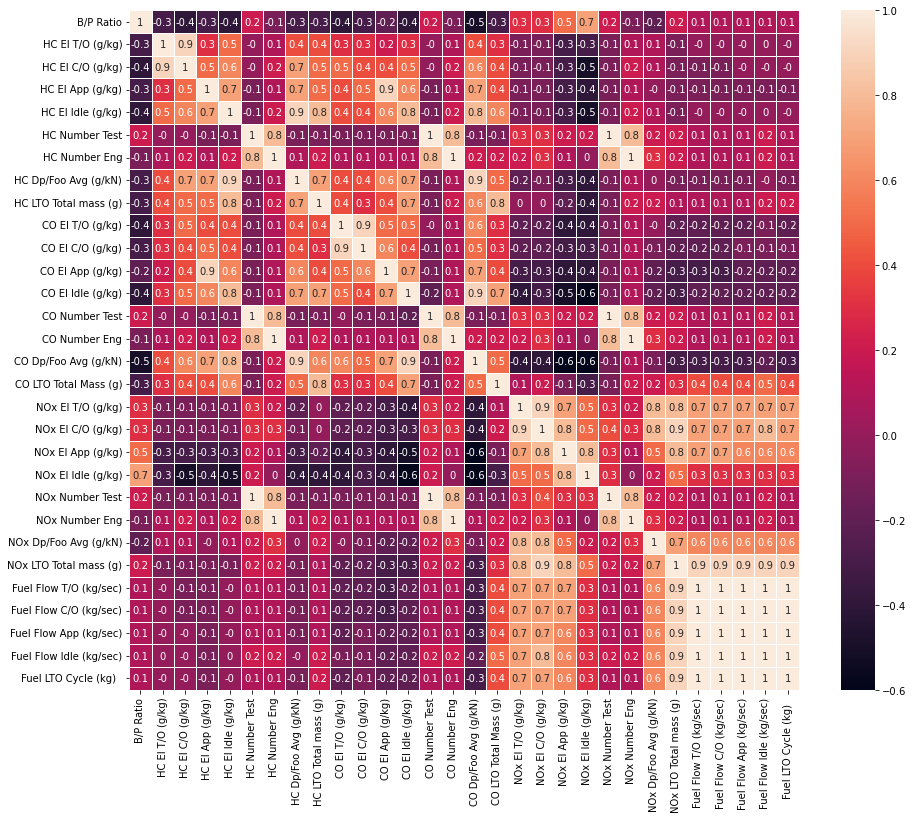

In [102]:
plt.figure(figsize=(15,12.5))
sns.heatmap(round(ges.corr(),1),annot=True, linewidth=0.9)
sns.color_palette("flare", as_cmap=True)
plt.show();

### Scatter Plots

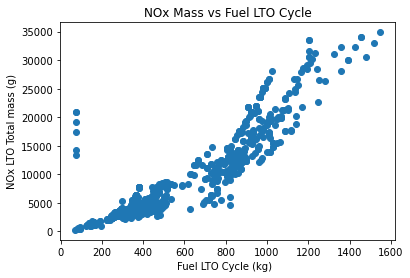

In [23]:
plt.scatter(ges['Fuel LTO Cycle (kg)  '], ges['NOx LTO Total mass (g)'])
plt.xlabel('Fuel LTO Cycle (kg)  ')
plt.ylabel('NOx LTO Total mass (g)')
plt.title('NOx Mass vs Fuel LTO Cycle')
plt.show()

This scatterplot shows that as Fuel LTO increases, NOx LTO also increases

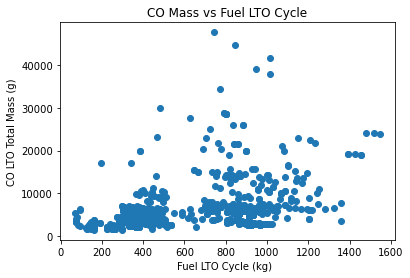

In [24]:
plt.scatter(ges['Fuel LTO Cycle (kg)  '], ges['CO LTO Total Mass (g)'])
plt.xlabel('Fuel LTO Cycle (kg)  ')
plt.ylabel('CO LTO Total Mass (g)')
plt.title('CO Mass vs Fuel LTO Cycle')
plt.show()

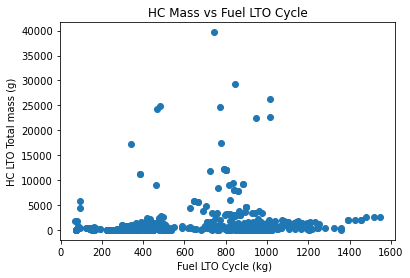

In [25]:
plt.scatter(ges['Fuel LTO Cycle (kg)  '], ges['HC LTO Total mass (g)'])
plt.xlabel('Fuel LTO Cycle (kg)  ')
plt.ylabel('HC LTO Total mass (g)')
plt.title('HC Mass vs Fuel LTO Cycle')
plt.show()

### Boxplot

In [26]:
import plotly.express as px
import plotly.graph_objects as go
data = ges

In [28]:
fig = px.box(ges2, x="Fuel LTO Cycle (kg)  ", y='Eng Type', points="outliers")
fig.show()

In [29]:
fig = px.box(ges, x="B/P Ratio", y='Eng Type', points="outliers", color_discrete_sequence = ['red'])
fig.show()

In [30]:
fig = px.box(ges, x="NOx LTO Total mass (g)", y='Eng Type', points="outliers", color_discrete_sequence = ['lime'])
fig.show()

In [31]:
fig = px.box(ges, x="CO LTO Total Mass (g)", y='Eng Type', points="outliers", color_discrete_sequence = ['hotpink'])
fig.show()

In [32]:
fig = px.box(ges, x="HC LTO Total mass (g)", y='Eng Type', points="outliers", color_discrete_sequence = ['goldenrod'])
fig.show()

Outliers:
- When considering by Engine Type, MTF has more outliers in "Fuel LTO Cycle", "B/P Ratio", and "NOx LTO Total Mass" compared to TF. 
- The CO and HC LTO Total Mass values are not distributed normally and we can see they each have more outliers for both engine types than NOx.
- All emissions LTO Total Mass is a right-skewed distribution indicating a positive skewness, where the mean is greater than the median. 

.

- We can use the median imputation method to treat missing values
- For outliers, if they are valid outliers(not caused due to an error) and data distribution is skewed(like this case) use IQR based filtering

In [33]:
# ges2 = ges[['Eng Type' , 'B/P Ratio', 'Fuel LTO Cycle (kg)  ' ,'HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)']]
# ges2.tail()

,Eng Type,B/P Ratio,Fuel LTO Cycle (kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g)
810,TF,5.1,151.0,337.0,2803.0,1086.0
811,TF,5.0,NaN,NaN,NaN,NaN
812,TF,5.0,265.0,NaN,NaN,NaN
813,TF,4.9,260.0,NaN,NaN,NaN
814,TF,4.9,274.0,NaN,NaN,NaN


In [34]:
ges2 = ges2.fillna(0)

In [35]:
ges2.isna().sum().sum()

0

### LINEAR REGRESSION

In [39]:
ges2.head()

,Eng Type,B/P Ratio,Fuel LTO Cycle (kg),HC LTO Total mass (g),CO LTO Total Mass (g),NOx LTO Total mass (g)
0,1,2.64,85.0,823.0,2612.0,630.0
1,1,2.64,92.0,393.0,2254.0,845.0
2,0,5.23,162.0,226.0,1468.0,1563.0
3,0,5.10,138.0,346.0,1850.0,1175.0
4,0,4.77,157.0,307.0,1865.0,1456.0


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the categorical column to numerical values using label encoding
le = LabelEncoder()
ges2['Eng Type'] = le.fit_transform(ges2['Eng Type'])

# Split the dataset into features (X) and targets (y)
X = ges2.drop(['HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'], axis=1)
y_HC = ges2['HC LTO Total mass (g)']
y_CO = ges2['CO LTO Total Mass (g)']
y_NOx = ges2['NOx LTO Total mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train_HC, y_test_HC, y_train_CO, y_test_CO, y_train_NOx, y_test_NOx = train_test_split(X, y_HC, y_CO, y_NOx, test_size=0.2, random_state=42)

# Create pipelines to scale the data and fit the linear regression models for each target variable
model_HC = make_pipeline(StandardScaler(), LinearRegression())
model_CO = make_pipeline(StandardScaler(), LinearRegression())
model_NOx = make_pipeline(StandardScaler(), LinearRegression())

# Train the linear regression models
model_HC.fit(X_train, y_train_HC)
model_CO.fit(X_train, y_train_CO)
model_NOx.fit(X_train, y_train_NOx)

# Predict the emissions for new data
new_data = pd.DataFrame({'B/P Ratio': [4.77], 'Fuel LTO Cycle (kg)  ': [157], 'Eng Type': [0]})
new_data['Eng Type'] = le.transform(new_data['Eng Type'])
emissions_HC = model_HC.predict(new_data)
emissions_CO = model_CO.predict(new_data)
emissions_NOx = model_NOx.predict(new_data)

# Print the predicted emissions
print("Predicted emissions:")
print(f"Hydrocarbons: {emissions_HC[0]} g")
print(f"Carbon monoxide: {emissions_CO[0]} g")
print(f"Oxides of nitrogen: {emissions_NOx[0]} g")

# Evaluate the models on the test set
y_pred_HC = model_HC.predict(X_test)
score_HC = r2_score(y_test_HC, y_pred_HC)
mse_HC = mean_squared_error(y_test_HC, y_pred_HC)
rmse_HC = np.sqrt(mse_HC)

y_pred_CO = model_CO.predict(X_test)
score_CO = r2_score(y_test_CO, y_pred_CO)
mse_CO = mean_squared_error(y_test_CO, y_pred_CO)
rmse_CO = np.sqrt(mse_CO)

y_pred_NOx = model_NOx.predict(X_test)
score_NOx = r2_score(y_test_NOx, y_pred_NOx)
mse_NOx = mean_squared_error(y_test_NOx, y_pred_NOx)
rmse_NOx = np.sqrt(mse_NOx)

print("R-Squared, MSE, and RMSE scores:")
print(f"Hydrocarbons: R-Squared={score_HC:.4f}, MSE={mse_HC:.4f},RMSE={rmse_HC:.4f}")
print(f"Carbon monoxide: R-Squared={score_CO:.4f}, MSE={mse_CO:.4f}, RMSE={rmse_CO:.4f}")
print(f"Oxides of nitrogen: R-Squared={score_NOx:.4f}, MSE={mse_NOx:.4f}, RMSE={rmse_NOx:.4f}")

Predicted emissions:
Hydrocarbons: -70735.63023361351 g
Carbon monoxide: -120428.18872889868 g
Oxides of nitrogen: 58502.35271379036 g
R-Squared, MSE, and RMSE scores:
Hydrocarbons: R-Squared=0.0610, MSE=9658722.2627,RMSE=3107.8485
Carbon monoxide: R-Squared=0.2662, MSE=27996453.6712, RMSE=5291.1675
Oxides of nitrogen: R-Squared=0.8925, MSE=7497230.5103, RMSE=2738.1071


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




Linear Regression Output Summary: 
The R-squared values of 0.0610, 0.2662, and 0.8925 indicate that the model fits the data poorly for HC and CO, but quite well for NOx.

The MSE and RMSE values show that the model has a high error for HC and CO, but a relatively low error for NOx.

Overall, the model seems to be performing poorly for predicting HC and CO, but quite well for predicting NOx. The output suggests that the model needs improvement to better fit the data and accurately predict emissions.

### RANDOM FOREST REGRESSION

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the categorical column to numerical values using label encoding
le = LabelEncoder()
ges2['Eng Type'] = le.fit_transform(ges2['Eng Type'])

# Split the dataset into features (X) and targets (y)
X = ges2.drop(['HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'], axis=1)
y_HC = ges2['HC LTO Total mass (g)']
y_CO = ges2['CO LTO Total Mass (g)']
y_NOx = ges2['NOx LTO Total mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train_HC, y_test_HC, y_train_CO, y_test_CO, y_train_NOx, y_test_NOx = train_test_split(X, y_HC, y_CO, y_NOx, test_size=0.2, random_state=42)

# Create pipelines to scale the data and fit the Random Forest models for each target variable
model_HC = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model_CO = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model_NOx = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))

# Train the Random Forest regression models
model_HC.fit(X_train, y_train_HC)
model_CO.fit(X_train, y_train_CO)
model_NOx.fit(X_train, y_train_NOx)

# Predict the emissions for new data
new_data = pd.DataFrame({'B/P Ratio': [4.77], 'Fuel LTO Cycle (kg)  ': [157], 'Eng Type': [0]})
new_data['Eng Type'] = le.transform(new_data['Eng Type'])
emissions_HC = model_HC.predict(new_data)
emissions_CO = model_CO.predict(new_data)
emissions_NOx = model_NOx.predict(new_data)

# Print the predicted emissions
print("Predicted emissions:")
print(f"Hydrocarbons: {emissions_HC[0]} g")
print(f"Carbon monoxide: {emissions_CO[0]} g")
print(f"Oxides of nitrogen: {emissions_NOx[0]} g")

# Evaluate the models on the test set
y_pred_HC = model_HC.predict(X_test)
score_HC = r2_score(y_test_HC, y_pred_HC)
mse_HC = mean_squared_error(y_test_HC, y_pred_HC)
rmse_HC = np.sqrt(mse_HC)

y_pred_CO = model_CO.predict(X_test)
score_CO = r2_score(y_test_CO, y_pred_CO)
mse_CO = mean_squared_error(y_test_CO, y_pred_CO)
rmse_CO = np.sqrt(mse_CO)

y_pred_NOx = model_NOx.predict(X_test)
score_NOx = r2_score(y_test_NOx, y_pred_NOx)
mse_NOx = mean_squared_error(y_test_NOx, y_pred_NOx)
rmse_NOx = np.sqrt(mse_NOx)

print("R-Squared, MSE, and RMSE scores:")
print(f"Hydrocarbons: R-Squared={score_HC:.4f}, MSE={mse_HC:.4f},RMSE={rmse_HC:.4f}")
print(f"Carbon monoxide: R-Squared={score_CO:.4f}, MSE={mse_CO:.4f}, RMSE={rmse_CO:.4f}")
print(f"Oxides of nitrogen: R-Squared={score_NOx:.4f}, MSE={mse_NOx:.4f}, RMSE={rmse_NOx:.4f}")

Predicted emissions:
Hydrocarbons: 170.64107620088996 g
Carbon monoxide: 4076.068114179424 g
Oxides of nitrogen: 9066.16 g
R-Squared, MSE, and RMSE scores:
Hydrocarbons: R-Squared=-0.3275, MSE=13655635.5785,RMSE=3695.3532
Carbon monoxide: R-Squared=0.2334, MSE=29249692.1940, RMSE=5408.2985
Oxides of nitrogen: R-Squared=0.9711, MSE=2017506.2323, RMSE=1420.3895


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




Random Forest Model: The R-squared values for HC and CO are negative, which means that the model performs worse than a horizontal line. The R-squared value for NOx is high, which indicates that the model explains most of the variance in the target variable.

In this case, the RMSE for HC and CO is higher than the corresponding values for the linear regression model, indicating that the random forest model performs worse in predicting these target variables. The RMSE value for NOx is lower, indicating better performance in predicting this target variable than the linear regression model.

### Support Vector Machines (SVM)

In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert the categorical column to numerical values using label encoding
le = LabelEncoder()
ges2['Eng Type'] = le.fit_transform(ges2['Eng Type'])

# Split the dataset into features (X) and targets (y)
X = ges2.drop(['HC LTO Total mass (g)', 'CO LTO Total Mass (g)', 'NOx LTO Total mass (g)'], axis=1)
y_HC = ges2['HC LTO Total mass (g)']
y_CO = ges2['CO LTO Total Mass (g)']
y_NOx = ges2['NOx LTO Total mass (g)']

# Split the data into training and testing sets
X_train, X_test, y_train_HC, y_test_HC, y_train_CO, y_test_CO, y_train_NOx, y_test_NOx = train_test_split(X, y_HC, y_CO, y_NOx, test_size=0.2, random_state=42)

# Create pipelines to scale the data and fit the SVM models for each target variable
model_HC = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))
model_CO = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))
model_NOx = make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma='auto'))

# Train the SVM regression models
model_HC.fit(X_train, y_train_HC)
model_CO.fit(X_train, y_train_CO)
model_NOx.fit(X_train, y_train_NOx)

# Predict the emissions for new data
new_data = pd.DataFrame({'B/P Ratio': [4.77], 'Fuel LTO Cycle (kg)  ': [157], 'Eng Type': [0]})
new_data['Eng Type'] = le.transform(new_data['Eng Type'])
emissions_HC = model_HC.predict(new_data)
emissions_CO = model_CO.predict(new_data)
emissions_NOx = model_NOx.predict(new_data)

# Print the predicted emissions
print("Predicted emissions:")
print(f"Hydrocarbons: {emissions_HC[0]} g")
print(f"Carbon monoxide: {emissions_CO[0]} g")
print(f"Oxides of nitrogen: {emissions_NOx[0]} g")

# Evaluate the models on the test set
y_pred_HC = model_HC.predict(X_test)
score_HC = r2_score(y_test_HC, y_pred_HC)
mse_HC = mean_squared_error(y_test_HC, y_pred_HC)
rmse_HC = np.sqrt(mse_HC)

y_pred_CO = model_CO.predict(X_test)
score_CO = r2_score(y_test_CO, y_pred_CO)
mse_CO = mean_squared_error(y_test_CO, y_pred_CO)
rmse_CO = np.sqrt(mse_CO)

y_pred_NOx = model_NOx.predict(X_test)
score_NOx = r2_score(y_test_NOx, y_pred_NOx)
mse_NOx = mean_squared_error(y_test_NOx, y_pred_NOx)
rmse_NOx = np.sqrt(mse_NOx)

print("R-Squared, MSE, and RMSE scores:")
print(f"Hydrocarbons: R-Squared={score_HC:.4f}, MSE={mse_HC:.4f},RMSE={rmse_HC:.4f}")
print(f"Carbon monoxide: R-Squared={score_CO:.4f}, MSE={mse_CO:.4f}, RMSE={rmse_CO:.4f}")
print(f"Oxides of nitrogen: R-Squared={score_NOx:.4f}, MSE={mse_NOx:.4f}, RMSE={rmse_NOx:.4f}")

Predicted emissions:
Hydrocarbons: 258.5916721826419 g
Carbon monoxide: 4762.195842632558 g
Oxides of nitrogen: 6170.692529846332 g
R-Squared, MSE, and RMSE scores:
Hydrocarbons: R-Squared=-0.0479, MSE=10778997.1224,RMSE=3283.1383
Carbon monoxide: R-Squared=-0.0839, MSE=41353882.4375, RMSE=6430.6984
Oxides of nitrogen: R-Squared=-0.1087, MSE=77295208.2356, RMSE=8791.7693


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.


c:\Users\bhakt\anaconda3\envs\name_of_my_env\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.




SVM: The R-squared scores are negative for all three emissions, which indicates that the model is not a good fit for the data. The MSE and RMSE scores are high for all three emissions, which further indicates that the model is not accurate. In summary, the SVM model does not provide a good fit for the data and its predictions may not be reliable.